<a href="https://colab.research.google.com/github/twisha-k/Python_notes/blob/main/117_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 117: PCA - Vector Projections




---

#### Teacher-Student Activities

In the previous class, we understood various concepts of linear algebra that are used in PCA. We also started exploring vectors that form the basis of principal components.

In today's class, we will understand a few more concepts of vectors that are vital in PCA. We will also try to figure out mathematically the best vector for PCA projection.

Before that, let us go through the concepts covered in the previous class and begin the class from the topic: **Activity 1: Scaling of Vectors**.

---

### Recap

#### Loading the Dataset

**Dataset Link:**  https://s3-whjr-curriculum-uploads.whjr.online/be99ea2b-cb07-4e52-b9ee-4c7e893ae48d.csv



In [ ]:
# Import the Python modules, read the dataset and create a Pandas DataFrame.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Read the dataset
wheat_df = pd.read_csv('https://s3-whjr-curriculum-uploads.whjr.online/52e55558-5ad7-4f93-a854-8186f415bc55.csv')
wheat_df.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [ ]:
# Rename the columns for better understandability
wheat_df.rename(columns = {'A': 'area', 'P': 'perimeter', 'C': 'compactness',
                            'LK': 'kernel_length', 'WK': 'kernel_width',
                            'A_Coef': 'asymmetry_coefficient', 'LKG':'kernel_groove_length'}, inplace = True)
wheat_df.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [ ]:
# Get the total number of rows and columns, data types of columns and missing values (if exist) in the dataset.
wheat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area                   210 non-null    float64
 1   perimeter              210 non-null    float64
 2   compactness            210 non-null    float64
 3   kernel_length          210 non-null    float64
 4   kernel_width           210 non-null    float64
 5   asymmetry_coefficient  210 non-null    float64
 6   kernel_groove_length   210 non-null    float64
 7   target                 210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


---

#### Exploratory Data Analysis


1. Analysis of data where kernel width is more than kernel length.
2. Check for anomalies in kernel groove length and kernel length.
3. Calculating compactness using area and perimeter.

$Compactness = \frac{4*Π*Area}{Circumference^2}$


In [ ]:
# Check for anomalies in 'kernel_width' and 'kernel_length'.
wheat_df[wheat_df['kernel_width'] > wheat_df['kernel_length']]

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length,target


In [ ]:
# Check for anomalies in kernel_groove_length and kernel_length.
print("Number of rows having kernel groove length > kernel length =",
      wheat_df[wheat_df['kernel_groove_length'] > wheat_df['kernel_length']].shape[0], "\n") # You can add this code part later.

wheat_df[wheat_df['kernel_groove_length'] > wheat_df['kernel_length']] # Write only this part of code first. Then add the preceding part later.

Number of rows having kernel groove length > kernel length = 15 



,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length,target
80,16.53,15.34,0.8823,5.875,3.467,5.532,5.880,1
85,18.27,16.09,0.8870,6.173,3.651,2.443,6.197,1
86,18.88,16.26,0.8969,6.084,3.764,1.649,6.109,1
97,18.98,16.57,0.8687,6.449,3.552,2.144,6.453,1
98,18.17,16.26,0.8637,6.271,3.512,2.853,6.273,1
106,18.85,16.17,0.9056,6.152,3.806,2.843,6.200,1
134,15.56,14.89,0.8823,5.776,3.408,4.972,5.847,1
139,16.23,15.18,0.8850,5.872,3.472,3.769,5.922,1
150,11.83,13.23,0.8496,5.263,2.840,5.195,5.307,2
154,11.36,13.05,0.8382,5.175,2.755,4.048,5.263,2


In [ ]:
# Obtain a clean DataFrame
clean_df = wheat_df[wheat_df['kernel_groove_length'] < wheat_df['kernel_length']]
clean_df

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2


In [ ]:
# Create a duplicate copy of the 'clean_df' DataFrame.
validation_df = clean_df.copy()
validation_df.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [ ]:
# Calculate the compactness value using the given formula
import math
validation_df['compactness_formula'] = (validation_df['area'] * 4 * (math.pi)) / (validation_df['perimeter'] ** 2)
validation_df

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length,target,compactness_formula
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0,0.870756
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0,0.880833
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0,0.904524
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0,0.894995
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0,0.902631
...,...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2,0.879156
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2,0.850664
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2,0.888960
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2,0.852621


In [ ]:
# Check for anomalies in 'compactness' feature
validation_df[validation_df['compactness'] - validation_df['compactness_formula'] > 0.01]

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length,target,compactness_formula


---

#### Applying PCA

By doing PCA, a major chunk of the information of the entire dataset is effectively compressed into fewer columns.

Let us first implement PCA using `sklearn` library and then we will discuss the complete concept behind the PCA algorithm in the later section.

Before applying PCA, let us obtain a new DataFrame containing only feature variables.



In [ ]:
# Create a DataFrame having only feature variables
wheat_features = clean_df.drop(['target'], axis = 1)
wheat_features.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [ ]:
# Normalise the column values.
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
scaled_values = standard_scaler.fit_transform(wheat_features)
wheat_scaled = pd.DataFrame(scaled_values)
wheat_scaled.columns = wheat_features.columns
wheat_scaled.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length
0,0.137294,0.211526,-0.012130,0.307200,0.129752,-0.964557,-0.343965
1,0.005179,0.002040,0.413828,-0.169903,0.185749,-1.762019,-0.887953
2,-0.199947,-0.370380,1.421788,-0.770278,0.196415,-0.647693,-1.157887
3,-0.356398,-0.486762,1.021134,-0.694946,0.308408,-0.939367,-1.199098
4,0.443244,0.327907,1.354309,0.067507,0.796380,-1.538624,-0.436690


---

#### The Recipe of PCA

As you might have understood so far, PCA is all about finding Principal Components for which the steps are as follows:

1. Take only the features (or dimensions) from a DataFrame.

2. Compute the mean for every dimension (or feature) of the whole dataset.

3. Compute the covariance matrix of the whole dataset. You will learn this concept in this lesson shortly.

4. Compute eigenvectors and the corresponding eigenvalues. You will learn this concept in this lesson shortly.

5. Sort the eigenvectors by decreasing eigenvalues and choose $k$ eigenvectors having the greatest eigenvalues to form a $n \times k$ dimensional matrix, say $W$ i.e., $W_{n \times k}$ where $n$ is the total number of features (or dimensions) in a DataFrame.

6. Use this $W_{n \times k}$ eigenvector matrix to transform the samples onto the new subspace.

<center>
<img src=https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/c64fbd2d-4017-490a-a568-ad557a3eac30.png> </center>

Let us now manually execute PCA (without `sklearn` module) and reduce the number of dimensions for the scaled wheat kernel dataset.



---

#### Covariance

**Covariance** is a statistical parameter that indicates the relationship between two features (or variables).
 - If an increase in one variable results in an increase in the other variable, then both the variables are said to have **positive** covariance.
 - If an increase or decrease in one variable results in an opposite change in the other variable, then both the variables are said to have a **negative** covariance.

Now, you might be wondering if this sounds exactly  like **correlation**. Well, not entirely. We will soon find out. Till then, to get a better understanding of both covariances, let's look at their mathematical formula.

Let $x_1$ and $x_2$ be two different features of a DataFrame. Then, mathematically, **covariance** is defined as

\begin{align}
\text{cov}(x_1, x_2) = \frac{1}{N}\sum_{i = 1} ^N (x_{1i} - \bar x_1)(x_{2i} - \bar x_2)
\end{align}

Where,

- $\bar x_1$ is the mean value of feature $x_1$
- $\bar x_2$ is the mean value of feature $x_2$
- $N$ is the total number of samples in a DataFrame
- $i$ is one of the samples in a DataFrame


Let us determine the covariance between all the features of the wheat kernel DataFrame.

**Step 1:** Get all the features (or dimensions) in an array (or data-frame or matrix) that we have already got and stored in the `wheat_features` variables.


In [ ]:
# Print the features of wheat kernel DataFrame.
wheat_features

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


In [ ]:
# Compute mean of features
wheat_features.mean()

area                     14.865103
perimeter                14.567371
compactness               0.871288
kernel_length             5.628428
kernel_width              3.263340
asymmetry_coefficient     3.676068
kernel_groove_length      5.386928
dtype: float64

**Step 3:** Compute the covariance matrix for all the features in the `wheat_features` DatFrame.

Instead of using the following formula:

\begin{align}
\text{cov}(x_1, x_2) = \frac{1}{N}\sum_{i = 1} ^N (x_{1i} - \bar x_1)(x_{2i} - \bar x_2)
\end{align}


We will use the `cov()` function of the Pandas module to calculate the covariance values between the features.


In [ ]:
# Compute covariance matrix for the wheat kernel DataFrame
wheat_features_cov_df = wheat_features.cov()
wheat_features_cov_df

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length
area,8.315874,3.704539,0.040995,1.199738,1.052290,-0.828353,1.218330
perimeter,3.704539,1.669786,0.015873,0.550923,0.458613,-0.344486,0.564172
compactness,0.040995,0.015873,0.000565,0.003642,0.006741,-0.011537,0.002409
kernel_length,1.199738,0.550923,0.003642,0.192891,0.141289,-0.085096,0.200653
kernel_width,1.052290,0.458613,0.006741,0.141289,0.141370,-0.127982,0.137488
asymmetry_coefficient,-0.828353,-0.344486,-0.011537,-0.085096,-0.127982,2.287469,0.022468
kernel_groove_length,1.218330,0.564172,0.002409,0.200653,0.137488,0.022468,0.236741


Notice that the covariance values do not necessarily range between $-1$ to $1$ which is the case with correlation.

Let's create a heatmap for the above covariance matrix.

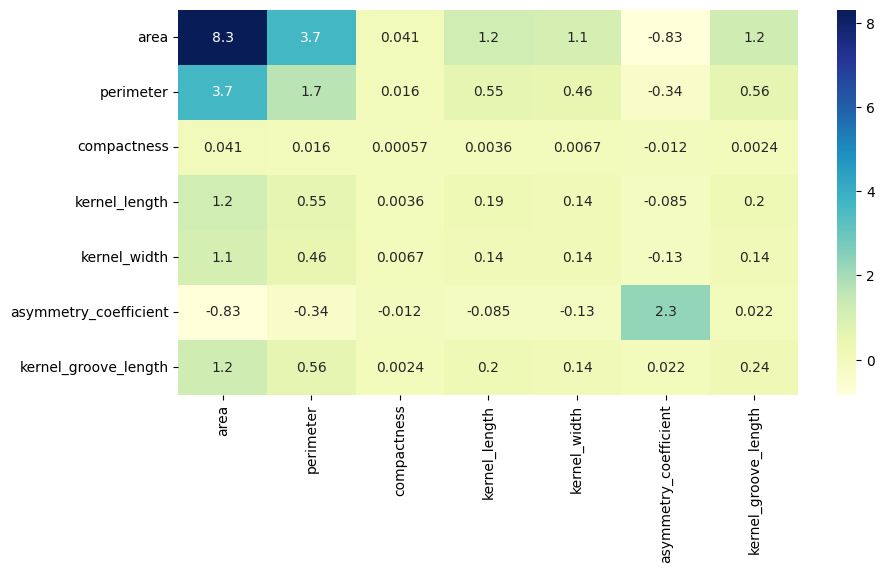

In [ ]:
# Create a covariance heatmap
plt.figure(figsize = (10, 5), dpi = 100)
sns.heatmap(wheat_features_cov_df, annot = True, cmap = 'YlGnBu')
plt.show()



We can see that `'area'` and `'perimeter'` columns have the highest positive covariance. This shouldn't be surprising because both area and perimeter of any object are highly dependent on each other. So, let's create a scatter plot between them.

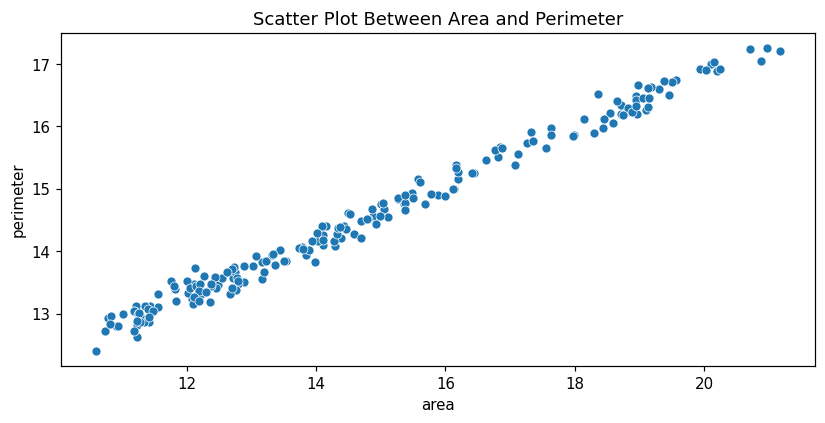

In [ ]:
# Create a scatterplot between area and perimeter.
plt.figure(figsize = (9, 4), dpi = 108)
plt.title("Scatter Plot Between Area and Perimeter")
sns.scatterplot(x = 'area', y = 'perimeter', data = wheat_features)
plt.show()

The above scatter plot confirms that as the `area` increases, the `perimeter` also increases and vice versa.

The features `'area'` and `'asymmetry_coefficient'` have the greatest negative correlation (`-0.83`). So, let's create a scatter plot between them.

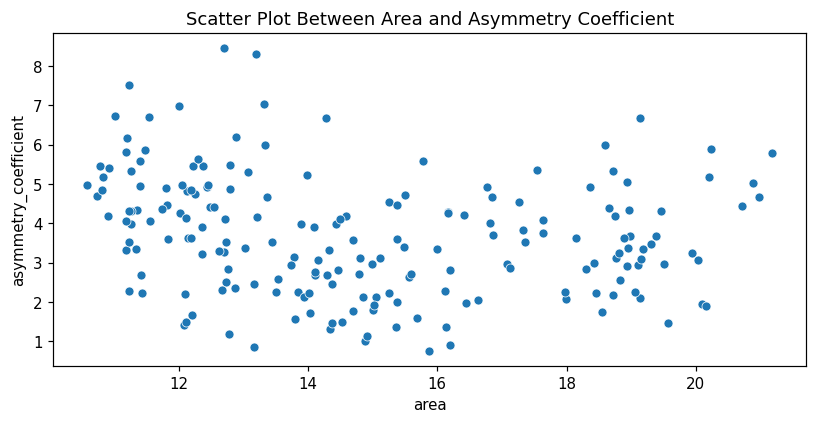

In [ ]:
# Create a scatterplot between area and asymmetry coefficient.
plt.figure(figsize = (9, 4), dpi = 108)
plt.title("Scatter Plot Between Area and Asymmetry Coefficient")
sns.scatterplot(x = 'area', y = 'asymmetry_coefficient', data = wheat_features)
plt.show()

When the negative covariance is very high, the slope of the straight line that fits the scatters in a plot, has a negative slope.

The above plot isn't the ideal example to understand negative covariance. Hence, let's create new arrays that will have a negative covariance with each other and then plot them through a scatter plot.

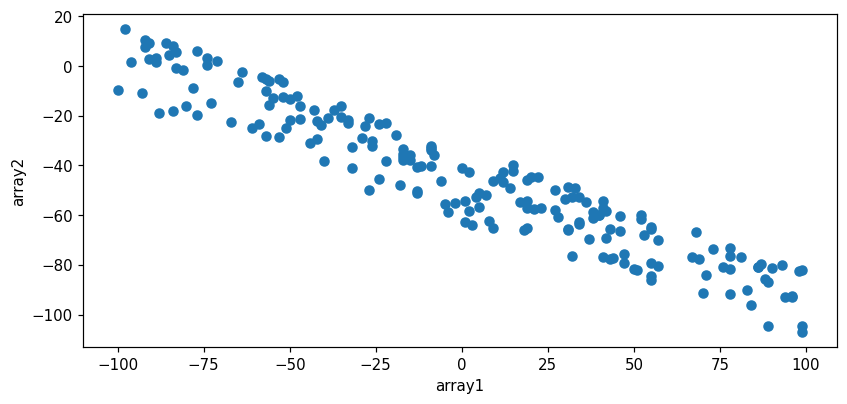

In [ ]:
# Demonstrate negative covariance
array1 = np.random.randint(low = -100, high = 100, size = 194)
array2 =  - (0.5 * array1 + 3 * wheat_features['area'].values)

plt.figure(figsize = (9, 4), dpi = 108)
plt.xlabel("array1")
plt.ylabel("array2")
plt.scatter(array1, array2)
plt.show()

Hence, the above scatterplot demonstrates how negative covariance looks like.

As you can see, much like correlation, covariance too tells the kind of relationship the two variables are having. Let us understand the difference between these two terms.

**Difference Between Covariance and Correlation:**

- **Covariance** indicates the direction of the linear relationship between variables.
- **Correlation**, on the other hand, measures both the strength and direction of the linear relationship between two variables.
- Correlation is a function of covariance.
- Another key difference between them is the fact that correlation values are standardised (lies between $-1$ and $1$) whereas, covariance values are not.

Mathematically, correlation is defined as

\begin{align}
r = \frac{\sum_{i = 1} ^N (x_{1i} - \bar x_1)(x_{2i} - \bar x_2)}{\sqrt{\sum_{i = 1} ^N (x_{1i} - \bar x_1)^2 \sum_{i = 1} ^N(x_{2i} - \bar x_2)^2}}
\end{align}

Where,

- $r$ is	the correlation coefficient.

- $x_{1i}$ is the value of some $i^{\text{th}}$ sample of the $x_1$ feature in a DataFrame.

- $x_{2i}$ is the value of some $i^{\text{th}}$ sample of the $x_2$ feature in a DataFrame.

- $\bar{x}_1$	is the mean of the values of the $x_1$ feature in a DataFrame.

- $\bar{x}_2$	is the mean of the values of the $x_2$ feature in a DataFrame.

- $N$ is the total number of samples.

Now, on dividing the numerator and denominator of $r$ by $N$, we get

\begin{align}
r = \frac{\frac{1}{N}\sum_{i = 1} ^N (x_{1i} - \bar x_1)(x_{2i} - \bar x_2)}{\frac{1}{N}\sqrt{\sum_{i = 1} ^N (x_{1i} - \bar x_1)^2 \sum_{i = 1} ^N(x_{2i} - \bar x_2)^2}}
\end{align}

The numerator in the above expression becomes $\text{cov}(x_1, x_2)$.

\begin{align}
\Rightarrow r = \frac{\text{cov}(x_1, x_2)}{\frac{1}{N}\sqrt{\sum_{i = 1} ^N (x_{1i} - \bar x_1)^2 \sum_{i = 1} ^N (x_{2i} - \bar x_2)^2}}
\end{align}

Now, consider the denominator. It becomes:

\begin{align}
\sqrt{\frac{\sum_{i = 1} ^N (x_{1i} - \bar x_1)^2 \sum_{i = 1} ^N (x_{2i} - \bar x_2)^2}{N^2}} \
\Rightarrow \sqrt{ \left( \frac{\sum_{i = 1} ^N (x_{1i} - \bar x_1)^2}{N} \right) \left( \frac{\sum_{i = 1} ^N (x_{2i} - \bar x_2)^2}{N} \right) } \
\Rightarrow \sqrt{ \left( \frac{\sum_{i = 1} ^N (x_{1i} - \bar x_1)^2}{N} \right)} \sqrt{\left( \frac{\sum_{i = 1} ^N (x_{2i} - \bar x_2)^2}{N} \right) }
\end{align}

We already know that:

$$\sqrt{ \left( \frac{\sum_{i = 1} ^N (x_{1i} - \bar x_1)^2}{N} \right)}$$

denotes standard deviation in the values of $x_1$ feature

$$\therefore \sigma_{x_1} = \sqrt{ \left( \frac{\sum_{i = 1} ^N (x_{1i} - \bar x_1)^2}{N} \right)}$$

Similarly,

$$\therefore \sigma_{x_2} = \sqrt{ \left( \frac{\sum_{i = 1} ^N (x_{2i} - \bar x_2)^2}{N} \right)}$$

Therefore, the denominator becomes

$$\sigma_{x_1} \times \sigma_{x_2}$$

So, the correlation expression becomes

\begin{align}
r = \frac{\text{cov}(x_1, x_2)}{\sigma_{x_1} \sigma_{x_2}}
\end{align}

In other words, the correlation is **covariance between two features divided by the product of their corresponding standard deviations**.

Now that we have computed the covariance matrix for wheat kernel dataset, we will proceed to the next step of PCA i.e. computing eigenvectors and eigenvalues.

---

#### Vectors

The next step is to calculate the eigenvectors and eigenvalues. But before that, you need to learn about vectors.

**Q:** What is a vector?

**A vector is an object that has magnitude as well as direction**. For example, consider the following two statements:

*Statement 1: Nikhil is driving his car at a speed of $6$ Km/hr*

*Statement 2: Nikhil is driving his car towards **east** on M.G. Road at a speed of $6$ Km/hr*

Whenever we attach direction to an object it becomes a **vector**. The figure below illustrates statement 2.

<br>

<center> <img src=https://s3-whjr-v2-prod-bucket.whjr.online/dc952b93-c716-492c-ba50-add03a143fc2.png width=500></center>

The figure above represents the **Velocity** of the car.

**Q:** What is Velocity?

**A:** Velocity is a measure of how fast something moves in a particular direction.

Hence, direction becomes an important factor. Speed is only half the information on velocity and direction is the other half.

The <b><font color ='maroon'>velocity arrow</font></b> (Velocity vector) indicates the direction of the vehicle and the length of the line joining A to B indicates the magnitude (speed).

Hence we can picture a vector as a directed line segment, the length of which determines the magnitude of the vector and the arrow indicates the direction. The direction of the vector is always from its tail to its head.

<center><img src=https://s3-whjr-v2-prod-bucket.whjr.online/758d2ad5-9009-4c38-a341-9575baedec35.png width=500></center>

The **Tail** is the starting point of the vector and the **Head** is the terminating point of the vector.

<br>

**Vectors in 3-D space:**

Consider an aeroplane taking off from Mumbai airport and flying to New Delhi airport. Here we need to specify $x, y,$ and $z$ coordinates to specify its location and velocity.

<center> <img src=https://s3-whjr-v2-prod-bucket.whjr.online/b4e1dcb2-85ab-4a57-aab0-0b132fbadf66.png width=1000></center>

As we know Mumbai is located in the southern part of India relative to New Delhi, we can say that the plane has to fly back to the North to reach New Delhi airport. During take-off say,  the target is to reach a certain height represent by point $B$ from the origin which is at Mumbai Airport.








---

#### Vector Representation

Let's see how to define vectors. In the above aeroplane example, we had an intermediate point $B$ in the 3-D space, the coordinates of which are:

\begin{align}
B = (-5,1.5,1)
\end{align}

If we draw a vector to this point from origin $A$, the vector can be described as:

\begin{align}
\vec{AB} = \begin{bmatrix}-5\\ 1.5\\ 1 \end{bmatrix}
\end{align}

**Note:** The $\rightarrow$ on $AB$ indicates that the object $AB$ is a vector.

Now let's define this vector by creating a NumPy array.


In [ ]:
# Create a 3D vector
vector_AB = np.array([-5, 1.5, 1])
print(vector_AB)

[-5.   1.5  1. ]


Here we see a vector in a 3-dimensional space. We can easily visualise the vectors in $2$ or $3$ dimensions, however, vectors can exist in higher dimensions as well.

When we have more than $3$ features in our dataset,  the elements in the array will also increase. For example, considering the wheat kernel dataset:

<center><img src=https://s3-whjr-v2-prod-bucket.whjr.online/2a82f726-ccea-45cd-91ce-b2d8edce8535.png width=900></center>

If we represent row $1$ in vector form it would be a 7-dimensional vector. It can be represented as:

\begin{align}
\vec {X_1} = \begin{bmatrix}14.88\\ 14.57\\ 0.8811\\ 5.554\\ 3.333\\ 1.018\\ 4.956\end{bmatrix}
\end{align}

Let's define this 7-dimensional vector by again creating a NumPy array.


In [ ]:
# Create a 7-dimensional vector.

vector_X1 = np.array([14.88, 14.57, 0.8811, 5.554, 3.333, 1.018, 4.956])
print('Vector for row 1: ', vector_X1)

Vector for row 1:  [14.88   14.57    0.8811  5.554   3.333   1.018   4.956 ]


So far the vectors we have seen start from the origin and hence the coordinates become the vector. *But what if the starting point is not the origin?*

 If the starting point of the vector is point $A(x_A, y_A)$ and the end point is $B(x_B, y_B)$, then the vector $\vec{AB}$ is represented as:

\begin{align}
\vec{AB} &= \vec{B} - \vec{A} \\
&= (x_B - x_A, y_B - y_A)
\end{align}

Let us take a simple problem statement to understand this:

**Statement**: You start from your home, pick up some burgers from McDonald's and go to your friend's home for a party.

Let us represent this using vectors.

<center> <img src=https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/bf75e1b4-5af7-49b2-b081-a8618f34f4c9.png width=650></center>

The image above describes the problem statement. The coordinates for various locations are:

1. Home $(x_h, y_h) = (0,0)$

2. McD $(x_m, y_m) = (6, 1.5)$

3. Party $(x_p, y_p) = (4, 4)$

The vector for Home to McD is calculated as:

\begin{align}
\vec{hm} &= \text{McD} - \text{Home} \\
&= (x_m - x_h, y_m - y_h) \\
&= \begin{bmatrix} 6 - 0 \\ 1.5 - 0 \end{bmatrix} \\
&= \begin{bmatrix} 6\\ 1.5\end{bmatrix}
\end{align}

Similarly, the vector for McD to Party is calculated as:

\begin{align}
\vec{mp} &= \text{Party} - \text{McD} \\
&= (x_p - x_m, y_p - y_m) \\
&= \begin{bmatrix}4 - 6 \\ 4 - 1.5 \end{bmatrix} \\
&= \begin{bmatrix} -2\\ 2.5\end{bmatrix}
\end{align}

The negative sign indicates that you have to ride the motorbike into another direction to reach your destination.

The same can be calculated using `numpy` module. For this, first define the coordinates for Home, McD and Party place as follows:

- `home = array([0, 0])`

- `mcd = array([6, 1.5])`

- `party = array([4, 4])`

Next obtain the respective vectors by subtracting the starting-point coordinates from the ending-point coordinates, Hence:

- $\vec{hm}$ will be calculated as `mcd - home`

- $\vec{mp}$ will be calculated as `party - mcd`


In [ ]:
# Obtaining Vectors from Coordinates

# Define the coordinates
home = np.array([0, 0])
mcd = np.array([6, 1.5])
party = np.array([4, 4])

# Obtain the respective Vectors
hm = mcd - home
mp = party - mcd

print('Vector from Home to McD is: ', hm)
print('Vector from McDonalds to Party place is: ', mp)

Vector from Home to McD is:  [6.  1.5]
Vector from McDonalds to Party place is:  [-2.   2.5]


Hence, we calculated the vector $\vec{hm}$  and $\vec{mp}$ by subtracting the starting-point coordinates from the ending-point coordinates.

---

**Vector Magnitude**

Now that we know about vector representation let us see how to calculate magnitude (also referred to as **norm**) of a vector. Recall the vector representation:

<center><img src=https://s3-whjr-v2-prod-bucket.whjr.online/758d2ad5-9009-4c38-a341-9575baedec35.png width=500></center>

Consider a vector starting from point $A = (x_A, y_A)$ and the terminating at point $B = (x_B, y_B)$. The magnitude/norm of a vector $\vec{AB}$ is defined as:

\begin{align}
|\vec{AB}| = \sqrt{(x_B - x_A)^2 + (y_B - y_A)^2}
\end{align}

Similarly consider the above vector $\vec{hm}$:

\begin{align}
\vec{hm} = \begin{bmatrix} 6\\ 1.5\end{bmatrix}
\end{align}

The magnitude of vector $\vec{hm}$ will be calculated as:

\begin{align}
|\vec{hm}| =& \sqrt{(x)^2 + (y)^2} \\
&= \sqrt{6^2 + 1.5^2}  \\
&= \sqrt{36 + 2.25} \\
&= \sqrt{38.25} \\
&= 6.1846
\end{align}

<br>

Similarly, consider an $n^{th}$ dimensional vector represented as:

\begin{align}
\vec V = \begin{bmatrix} x_1 \\ x_2 \\ .. \\ .. \\ .. \\ x_n\end{bmatrix}
\end{align}

The norm of vector $\vec V$ will be calculated as:

\begin{align}
|\vec V| = \sqrt{{x_1}^2 + {x_2}^2 + ..... +{x_n}^2}
\end{align}

For example, the 7-dimensional vector $\vec {X_1}$ represented by:

\begin{align}
\vec {X_1} = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5 \\ x_6 \\ x_7 \end{bmatrix} =  \begin{bmatrix}14.88\\ 14.57\\ 0.8811\\ 5.554\\ 3.333\\ 1.018\\ 4.956\end{bmatrix}
\end{align}

The norm of the vector $\vec {X_1}$ will be defined as:

\begin{align}
|\vec {X_1}| &= \sqrt{{x_1}^2 + {x_2}^2 + {x_3}^2 + {x_4}^2 + {x_5}^2 + {x_6}^2 + {x_7}^2} \\
&= \sqrt{14.88^2 + 14.57^2 + 0.8811^2 + 5.554^2 + 3.33^2 + 1.018^2 + 4.956^2} \\
&= \sqrt{221.4144 + 212.2849 + 0.776 + 30.847 + 11.11 + 1.036 + 24.562} \\
&= \sqrt{502.0303} \\
&= 22.406
\end{align}

<br>

The `linalg.norm()` function of `numpy` is used to calculate the norm of vectors. Let us calculate the norm of vector `X1` using this function.

In [ ]:
# Calculate the norm of a vector X1
print('For the vector X1: ', vector_X1)
print('Norm of vector is: ', np.linalg.norm(vector_X1))

For the vector X1:  [14.88   14.57    0.8811  5.554   3.333   1.018   4.956 ]
Norm of vector is:  22.406019329858662


---

**Components of a Vector**

Consider a 2-dimensional vector $\vec u$:

\begin{align}
\vec u = \begin{bmatrix} u_x \\ u_y \end{bmatrix} = \begin{bmatrix} 5 \\ 5 \end{bmatrix}
\end{align}

<center><img src=https://s3-whjr-v2-prod-bucket.whjr.online/13368db4-600d-4571-b20c-e5ca1bc9418d.png width=500></center>

Let's say we are riding our bike along the vector $\vec u$ in the above figure. This means the effective direction in which we are riding will be **North-East**.  This indicates that we would also be moving:

- In the East direction - indicated by $\vec {U_x}$.

- At the same time, in the west direction - indicated by $\vec {U_y}$.

The $\vec {U_x}$ and $\vec {U_y}$ are known as **vector components** or **projections**. Any given $n$-dimensional vector can always be represented by its $n$ components/projections.

**Vector Angle:**

The vector angle gives us a sense of direction for any given vector. In the above figure, the vector angle is indicated as $\theta$. It is the angle a vector makes with the horizontal-axis ($x$-axis).

The vector angle $\theta$ can easily be calculated with the help of trigonometry ratios:

\begin{align}
\text{tan} \space \theta = \frac{\text{Perpendicular}}{\text{Base}}
\end{align}

For the vector $\vec u$ this can be written as:

\begin{align}
\text{tan} \space \theta &= \frac{|\vec {U_y|}}{|\vec {U_x}|} \\
&= \frac{5}{5} \\
&= 1 \\
\Rightarrow \theta &= 45^o
\end{align}

<br>

We can also define a vector with the help of it's **magnitude** and **angle**.

For the vector $\vec u$, the magnitude be:

\begin{align}
|\vec u| = \sqrt{5^2 +5^2} = \sqrt {25+25} = \sqrt{50} = 7.07
\end{align}

**The vector $\vec u$ can also be represented as:**

\begin{align}
\vec u = \begin{cases} |\vec u| = 7.07 \\ \theta = 45^o \end{cases}
\end{align}


**Q**: How to calculate components of vectors if you are given with the above representation?

**A**: We can calculate the components of vectors using the trigonometric ratios.

**Trigonometric Ratios:**
The Trigonometry ratios of an angle $\theta$ in a right-angled triangle are defined as:

\begin{align}
\text{sin} \space \theta &= \frac{\text {Perpendicular}}{\text {Hypotenuse}}
\end{align}

\begin{align}
\text{cos} \space \theta &= \frac{\text {Base}}{\text {Hypotenuse}}
\end{align}

For the angle $\theta$ in the above image,

- $\text{Perpendicular} = \vec{u_y}$
- $\text{Base} = \vec{u_x}$
- $\text{Hypotenuse} = \vec{u}$

Thus,

\begin{align}
\text{sin} \space \theta &= \frac{|\vec u_y|}{|\vec u|}
\end{align}

Similarly,

\begin{align}
\text{cos} \space \theta &=  \frac{|\vec u_x|}{|\vec u|}
\end{align}

Hence, if we are given with magnitude of a vector ($|\vec u|$) and angle ($\theta$), we can find the component of the vectors ($|\vec u_x|$ and $|\vec u_y|$) using the above trigonometric ratios.



---

#### Activity 1: Scaling of Vectors


A **scalar** is an object that does not have any direction and is described with magnitude only. For example, if we want to describe $1$ Kg of apple we do not need its direction.

Since the scalar does not have any direction, when we multiply a vector by a scalar it is called **scaling** a vector, because we specify how big or small the vector is.

For example consider the following vector $\vec a$:

\begin{align}
a = \begin{bmatrix} 2 \\ 3 \\ 6 \end{bmatrix}
\end{align}

Let's say we have a scalar number $k = 1.5$

The multiplication of scalar to the vector can be calculated as:

\begin{align}
k \times a = 1.5 \times \begin{bmatrix} 2 \\ 3 \\ 6 \end{bmatrix} = \begin{bmatrix} 1.5 \times 2 \\ 1.5 \times 3 \\ 1.5 \times 6 \end{bmatrix}  = \begin{bmatrix} 3 \\ 4.5 \\ 9 \end{bmatrix}
\end{align}

The scalar multiplication can be described as:

<center><img src=https://s3-whjr-v2-prod-bucket.whjr.online/d5ee857c-2300-4508-a5d8-ebd5d257b81a.png></center>

**Note:** The direction of a vector is unaffected by scalar multiplication.


We can perform this operation directly using the NumPy array. For example,  create a vector $\vec{a}= \begin{bmatrix} 2 \\ 3 \\ 6 \end{bmatrix}$ and scale this vector by a magnitude of $1.5$.

In [ ]:
# S1.1: Scaling a vector
a = np.array([2, 3, 6])
print("Original vector:", a)
# Define scalar
k = 1.5
print("Scalar magnitude:", k)
# multiplication
scaled_vec = k * a
print("Scaled vector:", scaled_vec)

Original vector: [2 3 6]
Scalar magnitude: 1.5
Scaled vector: [3.  4.5 9. ]


Here, `scalar magnitude` is multiplied with each values of `Original vector` that gives `Scaled vector`.

---

#### Activity 2: Unit Vector

A vector that has a magnitude of 1 is known as a **unit vector**. It is represented by the symbol **^**, which is called a cap or hat. For example, the unit vector of a vector $\vec a$ is represented as $\hat{a}$.

The unit vector has the same direction coordinates as that of the given vector. It is also known as **direction vector** as it determines only direction.

<center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/7147cb35-d4c8-49f4-b48b-53e9fe140b86.png" width=350></center>

The unit vector $\hat{a}$ of $\vec a$ is obtained by dividing the vector $\vec a$ with its magnitude as follows:


\begin{align}
  \hat{a}=\frac{\vec{a}}{\left | \vec{a} \right |}
\end{align}

Consider a vector $\vec{A} = (12, 3, 4)$.

Thus, unit vector of $\vec{A}$ is calculated as:


\begin{align}
\hat{A} &=\frac{\vec{A}}{\left | \vec{A} \right |} \\
&= \frac{(12, 3, 4)}{\left | \sqrt{12^2 + 3^2 + 4^2} \right |} \\
&= \frac{(12, 3, 4)}{\left | \sqrt{169} \right |} \\
&= \frac{(12, 3, 4)}{13} \\
\end{align}

Thus,
\begin{align}
\hat{A} &= \bigg(\frac{12}{13}, \frac{3}{13}, \frac{4}{13} \bigg)
\end{align}

If we calculate $|\hat{A}|$, we will find that it is equal to $1$. In this way, you can obtain the unit vector of any given vector.

Let us normalise the above vector $\vec{A}$ to its unit vector by first calculating its magnitude (norm) using `np.linalg.norm()` function and then dividing the vector $\vec{A}$ by this norm value.

In [ ]:
# S2.1: Obtain unit vector of 'A'

A = np.array([12, 3, 4])
print("Orginal vector:", A)
unit_vecA = A / np.linalg.norm(A)
print("Unit vector:", unit_vecA)

Orginal vector: [12  3  4]
Unit vector: [0.92307692 0.23076923 0.30769231]


Hence, we obtained the same value of unit vector as that obtained mathematically.

Suppose unit vector $\hat{A}$ is a column matrix:

$$\hat{A}= \begin{bmatrix} \frac{12}{13} \\ \frac{3}{13} \\ \frac{4}{13} \end{bmatrix}$$

Transpose of this matrix would be:

$$\hat{A}^T= \begin{bmatrix} \frac{12}{13} & \frac{3}{13} & \frac{4}{13} \end{bmatrix}$$

If we multiply these two vectors i.e $\hat{A}. \hat{A}^T$:

$$\hat{A}. \hat{A}^T$$

\begin{align}  
\hat{A}. \hat{A}^T &= \begin{bmatrix} \frac{12}{13} \\ \frac{3}{13} \\ \frac{4}{13} \end{bmatrix} \begin{bmatrix} \frac{12}{13} & \frac{3}{13} & \frac{4}{13} \end{bmatrix} \\
&= \begin{bmatrix}\frac{144}{169} & \frac{9}{169} & \frac{16}{169} \end{bmatrix} \\
&= \begin{bmatrix}\frac{169}{169}  \end{bmatrix} \\
&= 1
\end{align}  

\begin{equation}
\boxed{\hat{A}. \hat{A}^T= 1}
\end{equation}

Thus, product of  a unit vector with its transpose is always equal to $1$.





---

#### Activity 3: Vector Products

Vectors can be multiplied in the following ways:

1. Vector product or Cross product:
    
    A cross product is used when we need the result to be a vector quantity. In essence the cross product describes how much the two vectors point in different directions.

2. Scalar product or Dot product:

    A dot product is used when we need the result to be a scalar quantity. In essence the dot product describes how much the vectors points in same direction.

Assume two vectors $\vec A$ and $\vec B$ defined in three dimensions as:

\begin{matrix}  
{\vec A} = \begin{bmatrix} A_x \\ A_y \\ A_z \end{bmatrix} &
{\vec B} = \begin{bmatrix} B_x \\ B_y \\ B_z \end{bmatrix}
\tag{3.1}
\end{matrix}  

Let's make a grid of the all the possible interactions for these two vectors:

<center><img src=https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/732bd190-4509-4a9e-8021-e283cf7b7829.png width=300></center>

As the vectors each have 3 componenets we will have a total of $ 3\times 3 = 9$ interactions where:

<center><h4><i>All possible interactions = interactions in similar dimensions + interactions in different dimensions</h4></i></center>

<br>

1. Dot product: The interactions of the same dimensions gives us the dot product.

2. Cross product: The interactions of the different dimensions gives us the cross product.


**CROSS PRODUCT OF VECTORS**

When two vectors are multiplied with each other and the product of the vectors is also a vector quantity, then the resultant vector is called the cross product of two vectors or the vector product. The resultant vector is perpendicular to the plane containing the two given vectors.

Mathematically the **cross product** of two vectors $\vec A$ and $\vec B$ is defined as:

\begin{equation}
\vec A \times \vec B = |\vec A| \space |\vec B| \space \text{sin} \theta \space \hat n
\tag{3.2}
\end{equation}

Where,

$\theta$ is the angle between vectors $\vec A$ and $\vec B$.

$\hat n$ is a unit vector orthogonal (perpendicular) to the plane containing $\vec A$ and $\vec B$.

**IMPORTANT NOTE :** The direction of the resulting vector is obtained with the help of right hand rule:

<img src=https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/b06b8b37-e680-4834-a7a4-57d08aec998e.png width=300>

**Right hand rule**: In this rule, if we use our index finger of the right hand in the direction of the first vector and the middle finger in the direction of the second vector. Then, the thumb of the right hand indicates the direction of the cross product of these two vectors.

**Cross product in matrix notation:**

From equation $3.1$ we have:

\begin{matrix}  
{\vec A} = \begin{bmatrix} A_x \\ A_y \\ A_z \end{bmatrix} &
{\vec B} = \begin{bmatrix} B_x \\ B_y \\ B_z \end{bmatrix}
\end{matrix}

The cross product for the matrix can be found by arranging the components of the vectors $\vec A$ and $\vec B$ along with the respective dimensions (in this case $x, y,  z$) in a matrix form:

\begin{matrix}
\vec A \times \vec B = \begin{bmatrix} x & y & z \\ A_x & A_y & A_z \\ B_x & B_y & B_z\end{bmatrix}
\end{matrix}

After solving the above matrix we get the cross product as:

\begin{align}
\vec A \times \vec B = (A_y B_z - A_z B_y)x - (A_x B_z - A_z B_x)y + (A_x B_y - A_y B_x)z
\end{align}

In matrix from this can be represented as:

\begin{matrix}
\vec A \times \vec B = \begin{bmatrix} A_y B_z - A_z B_y \\ -(A_x B_z - A_z B_x) \\ A_x B_y - A_y B_x \end{bmatrix} = \begin{bmatrix} A_y B_z - A_z B_y \\ A_z B_x - A_x B_z \\ A_x B_y - A_y B_x \end{bmatrix}
\tag{3.3}
\end{matrix}

**Note:**

1. Instead of memorising the result $3.3$ obtained above, remember the procedure of getting it.

2. Do not confuse matrix multiplication with vector cross product. They both are different.

**Direction of the resultant vector:** The resultant vector is always perpendicular to the vectors $\vec A$ and $\vec B$. The cross product is mostly used to determine the vector, which is perpendicular (orthogonal) to the plane surface spanned by two vectors.

<br>

Let's take a simple example to understand this:

\begin{matrix}  
{\vec A} = \begin{bmatrix} 3 \\ 2 \\ 3 \end{bmatrix} &
{\vec B} = \begin{bmatrix} 2 \\ 1 \\ 3 \end{bmatrix}
\end{matrix}

The resultant vector after applying cross product can be obtained from equation $3.3$:

\begin{matrix}
\vec A \times \vec B = \begin{bmatrix} 2 \times 3 - 3 \times 1 \\ 3 \times 2 - 3 \times 3 \\ 3 \times 1 - 2 \times 2 \end{bmatrix}
\end{matrix}

\begin{matrix}
\Rightarrow \vec A \times \vec B = \begin{bmatrix} 6 - 3 \\ 6 - 9 \\ 3 - 4 \end{bmatrix}
\end{matrix}

\begin{matrix}
\Rightarrow \vec A \times \vec B = \begin{bmatrix} 3 \\ -3 \\ -1 \end{bmatrix}
\end{matrix}

Find the cross product of two vectors (Ā and B̄).

In [ ]:
# S3.1: Finding cross product of two vectors
A = np.array([3, 2, 3])
print("First vector:", A)

# Second vector
B = np.array([2, 1, 3])
print("Second vector:", B)

# Using 'np.cross()' function to calculate cross product
cross_prod_AB = np.cross(A, B)
print("Cross Product:", cross_prod_AB)


First vector: [3 2 3]
Second vector: [2 1 3]
Cross Product: [ 3 -3 -1]


Hence, we obtained the cross product of vectors $\vec A$ and $\vec B$ which is vector, hence has components in all the three dimensions as the input vectors.

Let's verify the direction of the resultant vector by plotting the plane spanning across vectors $\vec A$, $\vec B$ and the resulting cross product of these two vectors:

<center><img src=https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/0db92848-e803-4490-a62c-e369d9c81b1e.png width=600></center>

In the above graph we can observe the plane passing through the vectors $\vec A$, and $\vec B$ is indicated in green and the resultant vector $\vec A \times \vec B$ is orthogonal (perpendicular) to the plane.


---

**DOT PRODUCT OF VECTORS**

Mathematically the **dot product** of two vectors $\vec a$ and $\vec b$ is defined as:

\begin{equation}
\vec a \cdot \vec b = |\vec a| |\vec b| \text{cos} \space \theta
\tag{3.4}
\end{equation}

Where, $\theta$ is the angle between vectors $\vec a$ and $\vec b$. The result of this dot product is a scalar value. Hence, it is also commonly known as **scalar Product** or **inner Product** of two vectors.

**Dot product in matrix notation:**


Let us represent the vectors $\vec{a}$ and $\vec{b}$ in matrix form as follows:

\begin{matrix}  
{a} = \begin{bmatrix} a_1 \\ a_2 \\ a_3 \\ \vdots \\ a_n \end{bmatrix}_{n \times 1} &
{b} = \begin{bmatrix} b_1 \\ b_2 \\ b_3 \\ \vdots \\ b_n \end{bmatrix}_{n \times 1}
\end{matrix}  

The dot product of $\vec{a}$ and $\vec{b}$ can also be calculated as:


\begin{equation}
\vec a \cdot \vec b = [(a_1 b_1) + (a_2 b_2) + (a_3 b_3) + \dots + (a_n b_n)]
\tag{3.5}
\end{equation}

If we try to multiply the above two vectors $\vec{a}$ and $\vec{b}$ using matrix multiplication, their product will not be defined. This is because, as per the rules of matrix multiplication, the number of columns of the first matrix must match the number of rows of the second matrix.

To rectify this problem, we can take transpose of the first matrix, turning it into a $1 n$ row matrix as follows:

\begin{matrix}  
a^T = \begin{bmatrix} a_1 & a_2 & a_3 & \cdots & a_n \end{bmatrix}_{1 \times n} &&
{b} = \begin{bmatrix} b_1 \\ b_2 \\ b_3 \\ \vdots \\ b_n \end{bmatrix}_{n \times 1}
\end{matrix}  

After taking transpose of $\vec{a}$, the product of vectors $\vec{a}$ and $\vec{b}$ is now well-defined as the number of columns of $\vec{a}$ is now equal to the number of rows of  $\vec{b}$ .


\begin{align}  
a^Tb &= \begin{bmatrix} a_1 & a_2 & a_3 & \cdots & a_n \end{bmatrix} \begin{bmatrix} b_1 \\ b_2 \\ b_3 \\ \vdots \\ b_n \end{bmatrix} \\
&= [(a_1 b_1) + (a_2 b_2) + (a_3 b_3) + \dots + (a_n b_n)]
\end{align}  

You may observe that the result of  above matrix multiplication $a^Tb$ is equivalent to the dot product of $\vec{a} . \vec{b}$ (Equation $3.2$).

Thus,
\begin{equation}
\boxed{\vec a \cdot \vec b = a^Tb}
\tag{3.6}
\end{equation}

In Python, we can obtain dot product of two vectors or matrices using `dot()` function of `numpy` module.

Let us find the dot product of following two vectors:

\begin{align}
\vec{A} = (12, 3, 4) &&  \vec{B} = (10, 20, 30)
\end{align}

In [ ]:
# S3.2: Finding dot product of two vectors
# First vector
A = np.array([12, 3, 4])
print("First vector:", A)

# Second vector
B = np.array([10, 20, 30])
print("second vector:", B)
# Using 'np.dot()' function to calculate dot product
dot_ab=np.dot(A,B)
print(dot_ab)


First vector: [12  3  4]
second vector: [10 20 30]
300


Hence, we obtained the dot product of vectors $\vec A$ and $\vec B$ which is a scalar value.

One important use of dot products is in projection of one vector onto another vector. Let us understand this concept as it is the core of PCA.

---

#### Activity 4: Projection of Vectors

Let's say we have two vectors $\vec u$ and $\vec v$ and the vector $\vec u$ makes an angle $\theta$ with respect to vector $\vec v$ as shown in image below:

<center><img src=https://s3-whjr-v2-prod-bucket.whjr.online/a59e9078-e6ed-4aad-b39c-f11f9dd821d0.png width = 700></center>

Imagine a light source, parallel to $\vec v$ , above $\vec u$. The light would cast rays perpendicular or orthogonal to $\vec v$.

$g$ is the shadow cast by $\vec u$ on $\vec v$. This shadow vector is known as the **projection** of vector $\vec u$ on vector $\vec v$.

 The line segment $g$ indicates the magnitude or length of this shadow vector and is also known as the **projection** of $\vec u$ on $\vec v$ or $\text{proj}_\vec{v} \vec {u}$. Let us determine the value  of $g$.

**Projection  of $\vec u$ on $\vec v$:**

We know that as per the trigonometry ratios of an angle $θ$  in a right-angled triangle:

\begin{align}
\text{cos} \space \theta &= \frac{\text {Base}}{\text {Hypotenuse}}
\end{align}

In the above image,
- $\text{Base} = g$
- $\text{Hypotenuse} = |\vec {u}|$

Therefore,

\begin{align}
\text{cos} \space \theta &= \frac{\text {g}}{|\vec {u}|}
\end{align}

This can be rewritten as:
\begin{align}
\text {g} &= |\vec {u}| \text{cos} \space \theta \\
\tag{4.1}
\end{align}

Recall the dot product formula of two vectors (equation $(3.1)$):

\begin{align}
\vec u . \vec v &= |\vec u| |\vec v| \text{cos} \space \theta \\
\Rightarrow
\text{cos} \space \theta &= \frac{\vec u . \vec v }{|\vec u| |\vec v|}
\tag{4.2}
\end{align}

Let us substitute this value of   $\text{cos} \space \theta$ in the equation $(4.1)$.

\begin{align}
\text {g} &= |\vec {u}| \times  \frac{\vec u . \vec v }{|\vec u| |\vec v|} \\
&= \frac{\vec u . \vec v }{|\vec v|} \\
\end{align}

Thus, the formula for calculating the projection of vector $\vec u$ onto another vector $\vec v$ is:

\begin{equation}
\boxed{\text{proj}_{\vec{v} \vec {u}} = \frac{\vec u . \vec v }{|\vec v|}}
\tag{4.3}
\end{equation}


Now that we have explored all the necessary concepts needed to understand the working of PCA, let us now learn how to determine the desired principal components or vectors mathematically.




---

#### Mathematics of Principal Components

In PCA, we start with $d$-dimensional vectors, and want to summarise them by projecting them
down into a $k$-dimensional subspace, where $k <= d$. Hence, we need to project original vectors onto the $k$ directions. These $k$-directions are nothing but the principal components.

**Q:** How to derive these principal components mathematically?

**A:** To derive these principal components, find the projections which maximize the variance.

Let us understand this concept with the help of an example.  Consider the following two-dimensional dataset.

<center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/cd975e30-9fdd-4ddb-bf2e-22a47e246254.png"/></center>


It appears that both the variables are highly and positively correlated with one another and most of the points lie along the <font color=red><b>
red</font></b> line as shown in the image below:

<center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/cd7f92ff-9b48-427d-bade-e1e306671147.png"/></center>

As such, we could reorient the axes to be centered on the data and parallel to the line above.

<center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/6d04fa50-0e30-4ed8-864c-202f34bd86a4.png"/></center>

Let's project each observation onto the primary axis.

<center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/b5992a88-f0d1-4939-99ca-566a3bd4785f.png"/></center>

Now, every observation lies on the primary axis.

<center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/31d3b6c2-cbb5-4f05-8535-4942f4fbf215.png"/></center>

Hence, we just compressed a two-dimensional dataset into one dimension by translating and rotating our axes. After this transformation, we only really have one relevant dimension and thus we can discard the second axis as shown in image below:

<center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/f9468a34-b08f-4f9f-a991-949075dcdd79.png"/></center>

If we compare the original observations with our new projections, we can see that it's not an exact representation of our data (refer the image below).

<center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/fbb3b9a7-aad4-405b-94d2-b901f354c4b2.png"/></center>

The distance between original observations and projections is a measure of information loss. Thus, the primary axis or first principal component is chosen in such a way that it gives minimum distance between projections and observations and thereby, less information loss.


Let us observe the above dataset in a different way. Observe the spread of the data along the green and orange directions.

<center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/e4755ec5-6f56-4dd0-a03d-f1dbd011a716.png"/></center>

Projecting our observations onto the orange vector would result in much more information loss as compared to projecting onto the green vector. Thus, the green vector not only captures the maximum variance of the data, but also minimises the distance between observations and their projections onto the vector.

<center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/19a196ed-d72d-4c01-a7ee-e7872dd6fecd.png"/></center>

Hence, we can say that, in PCA, minimising projection error or information loss can be accomplished by finding the direction of maximum variance within the data.

Let us learn how to find the vector that carries maximum variance in data mathematically.


---

#### Activity 5: Maximising  Variance

Given the set of observations ${x_i}$  in a $d$-dimensional dataset where, $i = 1, 2, …, N$.

Our goal is to find the projection of $x_i$ onto a space with dimensions $k < d$ such that it gives maximum variance.

We’ll start by looking for a one-dimensional projection. We define a vector $u_1$ as the direction of the lower-dimensional space.

<center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/4ebdf0ff-eafb-440d-b0e7-361f804bc732.jpg"/></center>

Since we are only interested in the direction of  this vector, we will consider $u_1$ to be a unit vector i.e. $|\vec u_1| = 1$.

The projection of a data vector $x_i$ onto
the unit vector $\vec u$ can be given as:
\begin{equation}
\text{proj}_\vec{u_1} \vec {x_i}=\frac{\vec u_1 . \vec x_i }{|\vec u_1|}
\tag{from equation 4.3 }
\end{equation}

As, $|\vec u_1| = 1$ and $\vec u_1 . \vec x_i = u_1^T.x$ (from equation $3.3$),

\begin{equation}
\text{proj}_\vec{u_1} \vec {x_i}= u_1^T.x_i
\tag{5.1}
\end{equation}

If $\bar{x}$ is the mean of the data observations $x_i$ in the original space, then the mean of $x_i$ in the projected space is given by:

\begin{equation}
\text{proj}_\vec{u_1} \bar {x}= u_1^T.\bar{x}
\tag{5.2}
\end{equation}

**Calculating variance:**

The variance of a dataset from its mean is calculated by finding the difference between each data value and the mean, squaring the differences and then finding the sum of all squared differences.

Thus, the variance of projections is given as:


\begin{align}
\text {var}(x_i) &= \frac{1}{N} \sum\limits_{i = 1}^N \bigg[\text{proj}_\vec{u_1} \vec {x_i} - \text{proj}_\vec{u_1} \bar {x}\bigg]^2 \\
&= \frac{1}{N} \sum\limits_{i = 1}^N \bigg[u_1^T.x_i - u_1^T.\bar{x}\bigg]^2 \\
&= \frac{1}{N} \sum\limits_{i = 1}^N \bigg[u_1^T .(x_i - \bar{x})\bigg]^2 \\
&= \frac{1}{N} \sum\limits_{i = 1}^N \underbrace{\bigg[u_1^T . (x_i - \bar{x})\bigg]}_\text{1st term} \underbrace{\bigg[u_1^T . (x_i - \bar{x})\bigg]}_\text{2nd term} \\ \\
\end{align}

The $2^{nd}$ term in the above equation can also be written as : $\bigg[u_1. (x_i - \bar{x})^T\bigg]$ as both $u_1$ and $(x_i - \bar{x})$ are vectors and their dot product will be same no matter in whichever order we take transpose i.e.

$\bigg[u_1^T. (x_i - \bar{x})\bigg] \equiv \bigg[u_1. (x_i - \bar{x})^T\bigg]$

Thus,

\begin{align}
\text {var}(x_i) &= \frac{1}{N} \sum\limits_{i = 1}^N \bigg[u_1^T . (x_i - \bar{x})\bigg]\bigg[u_1 . (x_i - \bar{x})^T\bigg] \\
&= u_1^T. u_1.\frac{1}{N} \sum\limits_{i = 1}^N \bigg[(x_i - \bar{x}).(x_i - \bar{x})^T \bigg] \\
&= u_1^T. S. u_1 \\
\end{align}

Where, $S$ is the  covariance matrix of the observed data in the original high dimensional space.


$S = \frac{1}{N} \sum\limits_{i = 1}^N \bigg[(x_i - \bar{x}).(x_i - \bar{x})^T \bigg]$

**Note:** Such covariance matrix is known as **closed form of covariance matrix**. We will not explore this in much detail.

Thus,
\begin{align}
\text {var}(x_i) = u_1^T. S. u_1
\end{align}

Our goal is to obtain a vector $u_1$ such that it  maximises variance of projections i.e. $\text{var}(x_i)$ with the constraint $|u_1| = 1$ or $u_1^T. u_1 = 1$.

Thus, the maximisation function looks like this:

\begin{align}
\text{max} \space && u_1^T. S. u_1 \\
\text{subject to} \space && u_1^T. u_1 = 1
\end{align}

Such problems of constrained optimization can be solved easily using **Lagrangian multipliers**.
This technique says that if we need to maximise a function $f(x)$ subject to constraint $g(x)=c$, we introduce the Lagrange multiplier $\lambda$ and construct the Lagrangian $\mathcal{L}(x, \lambda)$:

$$\mathcal{L}(x, \lambda) = f(x) - \lambda (g(x) - c)$$

In our case,
- $f(x) = u_1^T. S. u_1$
- $g(x) = u_1^T. u_1$
- $c = 1$

Thus, our Lagrangian is:

$$\mathcal{L}(u_1, \lambda_1) = u_1^T. S. u_1 - \lambda_1 (u_1^T. u_1 - 1)$$

Taking partial derivative of above lagrangian function with respect to $u_1$,

\begin{align}
\frac{\partial \mathcal{L}}{\partial u_1} = 2.S.u_1 - 2 .\lambda_1. u_1
\tag{5.3}
\end{align}

**Note:** We will not get into details of how to take partial derivatives of vectors. You can refer the following examples to understand common vector derivative. They look similar to scalar ones, hence you can memorise them easily. In these examples, $b$ is a constant scalar, and $B$ is a constant matrix.

<img src="https://s3-whjr-v2-prod-bucket.whjr.online/5878b96e-c166-422c-9d1d-dad77589a6b8.PNG"/>

is beyond the scope
equating the above equation to $0$, we get
\begin{align}
2.S.u_1 - 2 .\lambda_1. u_1 = 0 \\
S.u_1 - \lambda_1. u_1 = 0 \\
\boxed{S.u_1 = \lambda_1. u_1} \tag{5.4}
\end{align}

This desired vector $u_1$ is nothing but an **eigenvector** of the covariance matrix $S$, and the maximum variance is equal to the **eigenvalue** $\lambda_1$. This is good news because, all you need to do is find eigenvectors having the largest eigenvalue and you will get your principal component or the desired dimension.

Similarly, we can obtain additional principal components  by choosing directions that maximise variance while being orthogonal to the existing ones.

In the next class, we will learn how to calculate the eigenvectors and their corresponding eigenvalues and obtain the desired transformed axis.



---

### **Project**
You can now attempt the **Applied Tech Project 117 - PCA III - Vector Projections** on your own.

**Applied Tech Project 117 - PCA III - Vector Projections**: https://colab.research.google.com/drive/1BYUNXXJ-UHF2fzlmI9zraD2PcxCz0cGg

---